In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [23]:

data_dir = tf.keras.utils.get_source_inputs('C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\train')

In [24]:
data_dir

'C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\train'

In [25]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train')

In [26]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/a/c (1).jpg'),
 WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/a/c (10).jpg'),
 WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/a/c (11).jpg'),
 WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/a/c (12).jpg'),
 WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/a/c (13).jpg')]

In [27]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

80


In [28]:
cats = list(data_dir.glob('cats/*'))
cats[:5]

[WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/cats/1.jpg'),
 WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/cats/10.jpg'),
 WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/cats/11.jpg'),
 WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/cats/12.jpg'),
 WindowsPath('C:/Users/Arbaj/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/cats/13.jpg')]

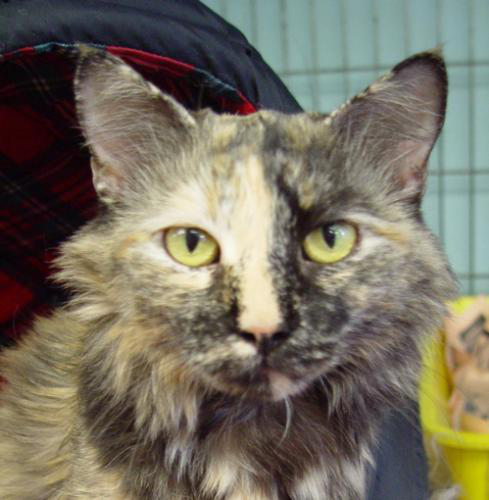

In [29]:
PIL.Image.open(str(cats[1]))

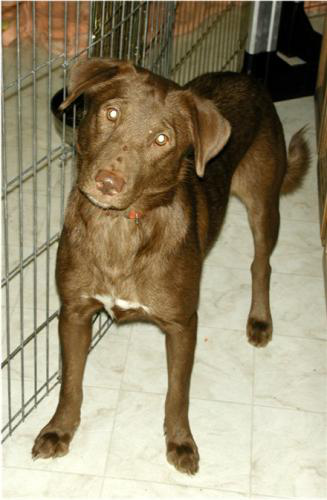

In [30]:
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[0]))

In [31]:
flowers_images_dict = {
    'cats': list(data_dir.glob('cats/*')),
    'dogs': list(data_dir.glob('dogs/*')),
}

In [32]:
flowers_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [33]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [34]:
X = np.array(X)
y = np.array(y)

In [35]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [37]:
num_classes = 2

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
1/1 [==============================] - 20s 20s/step - loss: 0.6955 - accuracy: 0.4667
Epoch 2/30
1/1 [==============================] - 0s 50ms/step - loss: 0.5804 - accuracy: 0.6667
Epoch 3/30
1/1 [==============================] - 0s 35ms/step - loss: 1.6796 - accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 35ms/step - loss: 0.4992 - accuracy: 0.9333
Epoch 5/30
1/1 [==============================] - 0s 33ms/step - loss: 0.8931 - accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 31ms/step - loss: 0.7530 - accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 31ms/step - loss: 0.5657 - accuracy: 0.5333
Epoch 8/30
1/1 [==============================] - 0s 26ms/step - loss: 0.4676 - accuracy: 0.9000
Epoch 9/30
1/1 [==============================] - 0s 34ms/step - loss: 0.5470 - accuracy: 0.5667
Epoch 10/30
1/1 [==============================] - 0s 32ms/step - loss: 0.4710 - accuracy: 0.9000
Epoch 11/30
1/1 [============

In [38]:

model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 1s 916ms/step - loss: 1.4121 - accuracy: 0.5000


[1.4121191501617432, 0.5]

In [40]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

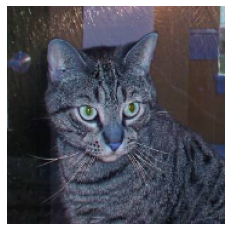

In [41]:
plt.axis('off')
plt.imshow(X[0])

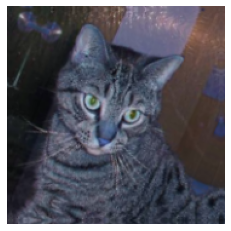

In [42]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [43]:
num_classes = 2

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.7003 - accuracy: 0.4667
Epoch 2/30
1/1 [==============================] - 0s 79ms/step - loss: 1.0951 - accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 76ms/step - loss: 0.9489 - accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 81ms/step - loss: 0.8136 - accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 75ms/step - loss: 0.7117 - accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 69ms/step - loss: 0.6858 - accuracy: 0.6333
Epoch 7/30
1/1 [==============================] - 0s 70ms/step - loss: 0.6895 - accuracy: 0.5000
Epoch 8/30
1/1 [==============================] - 0s 75ms/step - loss: 0.6886 - accuracy: 0.5000
Epoch 9/30
1/1 [==============================] - 0s 78ms/step - loss: 0.6838 - accuracy: 0.5000
Epoch 10/30
1/1 [==============================] - 0s 71ms/step - loss: 0.6857 - accuracy: 0.5333
Epoch 11/30
1/1 [==============

In [44]:

model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 358ms/step - loss: 0.9245 - accuracy: 0.3000


[0.9245073199272156, 0.30000001192092896]